## Observations and Insights 

In [55]:
# Dependencies and Setup; THIS WILL BE GREAT!!
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Formating for the entire script
pd.options.display.float_format = "{:,.2f}".format


In [56]:
mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.00,0
1,f932,0,45.00,0
2,g107,0,45.00,0
3,a457,0,45.00,0
4,c819,0,45.00,0


In [57]:
# Combine the data into a single dataset

# Display the data table for preview

Merged_Data_df = pd.merge(mouse_metadata, study_results, how='outer' )
Merged_Data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [58]:
# Checking the number of mice.

#By pulling the count by Mouse ID, we can Identify that there is duplicated mice ID's

mice_count = Merged_Data_df["Mouse ID"].value_counts()
mice_count.head()

g989    13
y163    10
c282    10
l733    10
c758    10
Name: Mouse ID, dtype: int64

In [59]:
#mice quantity is 249.

mice_quantity = len(mice_count)
mice_quantity

249

In [60]:
mice_count = mouse_metadata.loc[:,["Mouse ID"]]
mice_count_table = mice_count.count()
mice_count_table

pd.DataFrame({"The Mice Count is " : [mice_count_table]})

## MICE TOTAL COUNT IS 249

,The Mice Count is
0,Mouse ID 249 dtype: int64


In [61]:
Merged_Data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [62]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#mice_unique = Merged_Data_df.loc[:,['Mouse ID', 'Timepoint']].duplicated()
mice_unique = Merged_Data_df.loc[Merged_Data_df.duplicated(['Mouse ID',]),'Mouse ID'].unique()
#mice_unique_totals = mice_unique['Mouse ID'].duplicated()
len(mice_unique)

#Result Presentation
#pd.DataFrame({"Total Unique Mice is ": [mice_unique]})

## MICE TOTAL COUNT IS 249 Verified
##MICE UNIQUE COUNT IS 237 verified

237

In [63]:
# Optional: Get all the data for the duplicate mouse ID. 

#

In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [65]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Statistics_tumor = Merged_Data_df.groupby('Tumor Volume (mm3)')
Statistics_tumor = Merged_Data_df.groupby('Drug Regimen')
Statistics_tumor.head()

       # tumor_mean= Statistics_tumor['Tumor Volume (mm3)']
    
        

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
10,s185,Capomulin,Female,3,17,0,45.00,0
11,s185,Capomulin,Female,3,17,5,43.88,0
12,s185,Capomulin,Female,3,17,10,37.61,0
13,s185,Capomulin,Female,3,17,15,38.18,0
14,s185,Capomulin,Female,3,17,20,36.87,0


In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [68]:
tumor_mean = Statistics_tumor['Tumor Volume (mm3)'].mean()
tumor_median = Statistics_tumor['Tumor Volume (mm3)'].median()
tumor_variance = Statistics_tumor['Tumor Volume (mm3)'].var()
tumor_std_dev = Statistics_tumor['Tumor Volume (mm3)'].std()
tumor_sem = Statistics_tumor['Tumor Volume (mm3)'].sem()


tumor_mean
tumor_median 
tumor_variance
tumor_std_dev
tumor_sem

Drug Regimen
Capomulin   0.33
Ceftamin    0.47
Infubinol   0.49
Ketapril    0.60
Naftisol    0.60
Placebo     0.58
Propriva    0.51
Ramicane    0.32
Stelasyn    0.57
Zoniferol   0.52
Name: Tumor Volume (mm3), dtype: float64

In [69]:
Summary_Statistics = pd.DataFrame({"Tumor Mean" : tumor_mean, "Tumor Median" : tumor_median, "Tumor Variance" : tumor_variance,
                                   "Tumor Standard Deviation" : tumor_std_dev, "Tumor SEM" : tumor_sem })

Summary_Statistics

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<IPython.core.display.Javascript object>


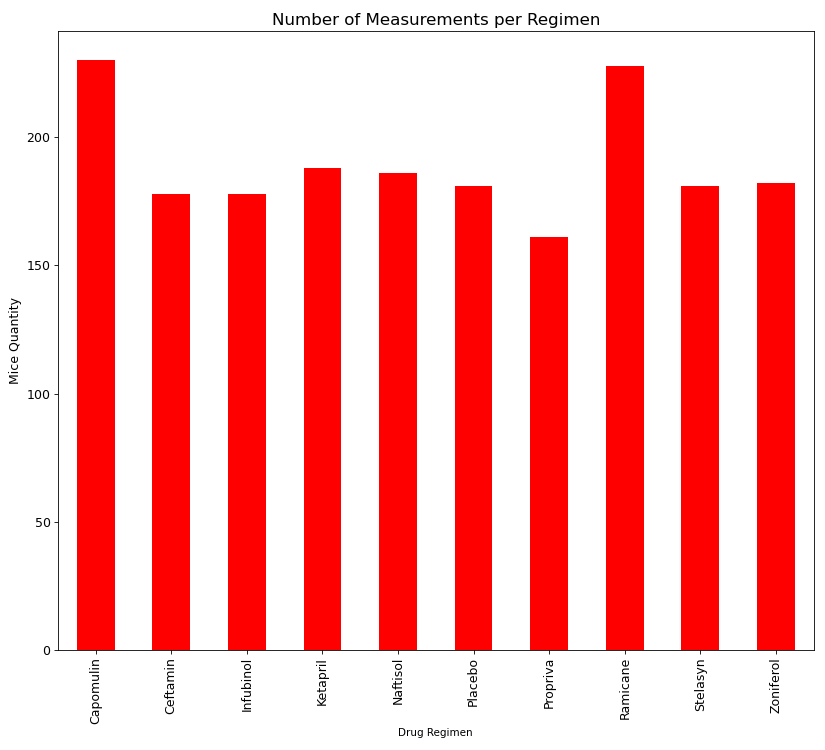

In [70]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

Count_per_regimen = Merged_Data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot00 = Count_per_regimen.plot.bar(figsize=(11,10), color='r',fontsize = 12)

plt.title("Number of Measurements per Regimen",fontsize = 16)
plt.ylabel("Mice Quantity", fontsize = 12)

plt.tight_layout()
plt.show()

In [71]:
#Creating a List for the second Plot (pyplot) for 'y' axis

Mice_qty = (Merged_Data_df.groupby(["Drug Regimen"]).count()["Mouse ID"])
Mice_qty

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


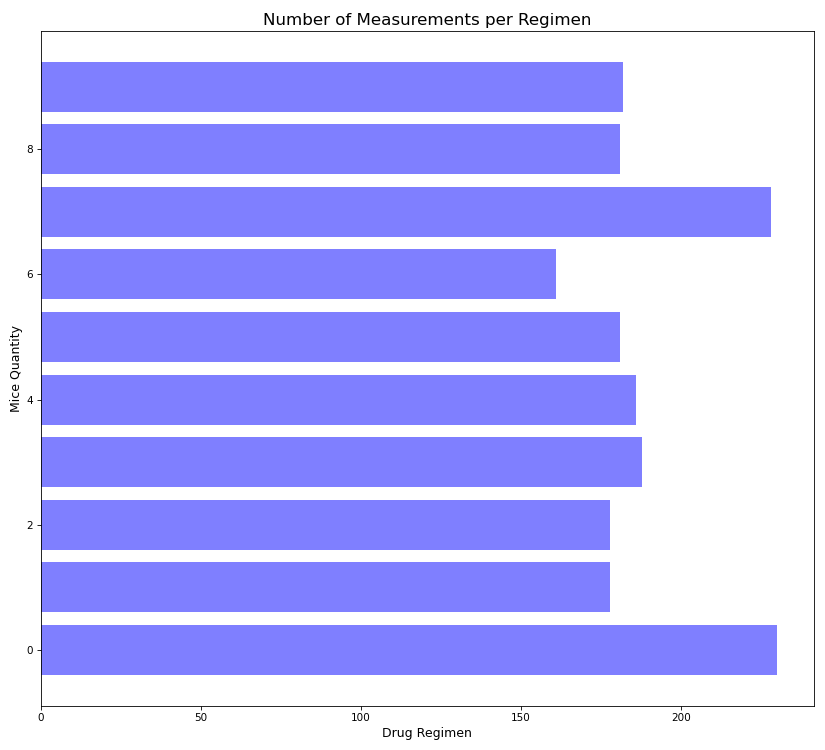

In [72]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using matplotlib.pyplot.barh to differentate with previous chart


Count_per_regimen2 = np.arange(len(Count_per_regimen))

fig1, ax1 =plt.subplots(figsize=(11,10))

plt.barh(Count_per_regimen2, Mice_qty, color='b', alpha=0.5, align='center')

plt.title("Number of Measurements per Regimen",fontsize = 16)
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Mice Quantity", fontsize = 12)

plt.tight_layout()
plt.show()

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Filtering Data to create Gender Df

gender_df = Merged_Data_df.groupby(["Mouse ID", "Sex"])
gender_total_df = pd.DataFrame(gender_df.size())

mouse_gender =pd.DataFrame(gender_total_df.groupby(["Sex"]).count())

mouse_gender


,0
Sex,
Female,124
Male,125


In [143]:
female_mouse = 124
male_mouse = 125

female_mouse_porcentage = (female_mouse / mice_quantity) * 100
male_mouse_porcentage = (male_mouse / mice_quantity) * 100

mouse_sex_distribution = pd.DataFrame({'Female_mouse_porcentage' :[female_mouse_porcentage], 'Male_mouse_porcentage' :[male_mouse_porcentage]})

#mouse_sex_distribution_df = mouse_sex_distribution_df.reset_index()
#display(mouse_sex_distribution_df)
mouse_sex_distribution

,Female_mouse_porcentage,Male_mouse_porcentage
0,49.80,50.20


<IPython.core.display.Javascript object>


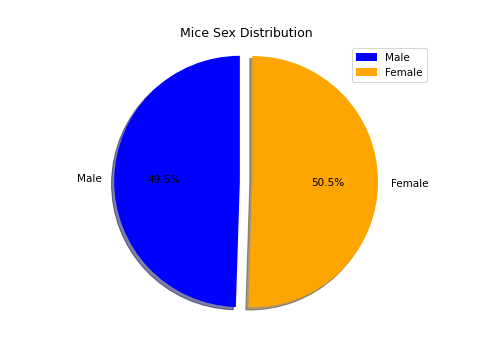

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mylabels = ["Male", "Female"]
distribution = [49, 50]
mycolors = ["blue", "orange"]
myexplode = [0.1, 0]

fig1, ax1 = plt.subplots()
plt.pie(distribution, colors=mycolors, labels=mylabels, explode=myexplode, autopct="%1.1f%%", shadow=True, startangle=90,)


#ax2.pie(mouse_sex_distribution_df, explode=myexplode, labels=mylabels)

plt.axis('equal')
plt.legend(loc="best")
plt.title("Mice Sex Distribution")
plt.show()



In [137]:
mouse_sex_distribution_df

,Female_mouse_porcentage,Male_mouse_porcentage
0,49.80,50.20


<IPython.core.display.Javascript object>


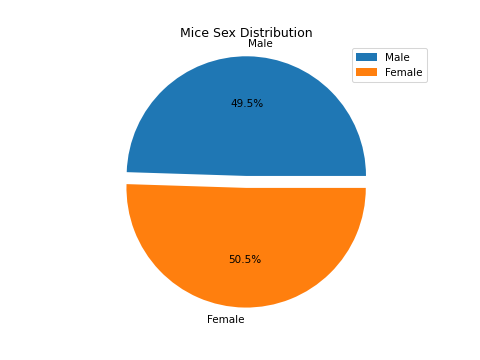

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

y = np.array([49, 50])

mylabels = ["Male", "Female"]
mycolors = ["b", "#4CAF50"]
myexplode = [0.1, 0]

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=myexplode, labels=mylabels, autopct="%1.1f%%")

plt.legend(loc="best")
plt.title("Mice Sex Distribution")
#plt.ylabel(" ")
plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [165]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Creating the Df's for each 4 treatment regimens

capomulin_df = Merged_Data_df.loc[Merged_Data_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = Merged_Data_df.loc[Merged_Data_df["Drug Regimen"] == "Ramicane",:]
infubinol_df = Merged_Data_df.loc[Merged_Data_df["Drug Regimen"] == "Infubinol",:]
ceftamin_df = Merged_Data_df.loc[Merged_Data_df["Drug Regimen"] == "Ceftamin",:]

#Verifying the data frame 

#ceftamin_df
#infubinol_df
#ramicane_df
#capomulin_df

In [161]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#Capomulin

capomulin_last_timepoint = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_volume = pd.DataFrame(capomulin_last_timepoint)
#capomulin_tumor_volume
capomulin_vol_last = pd.merge(capomulin_volume, Merged_Data_df, on=("Mouse ID", "Timepoint"), how="left")
capomulin_vol_last.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.98,2
1,b742,45,Capomulin,Male,7,21,38.94,0
2,f966,20,Capomulin,Male,16,17,30.49,0
3,g288,45,Capomulin,Male,3,19,37.07,1
4,g316,45,Capomulin,Female,22,22,40.16,2


In [163]:
#Ramicane

ramicane_last_timepoint = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_volume = pd.DataFrame(ramicane_last_timepoint)
#ramicane_volume
ramicane_vol_last = pd.merge(ramicane_volume, Merged_Data_df, on=("Mouse ID", "Timepoint"), how="left")
ramicane_vol_last.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.41,1
1,a444,45,Ramicane,Female,10,25,43.05,0
2,a520,45,Ramicane,Male,13,21,38.81,1
3,a644,45,Ramicane,Female,7,17,32.98,1
4,c458,30,Ramicane,Female,23,20,38.34,2


In [164]:
#Infubinol

infubinol_last_timepoint = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_volume = pd.DataFrame(infubinol_last_timepoint)
#infubinol_volume
infubinol_vol_last = pd.merge(infubinol_volume, Merged_Data_df, on=("Mouse ID", "Timepoint"), how="left")
infubinol_vol_last.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a577,30,Infubinol,Female,6,25,57.03,2
3,a685,45,Infubinol,Male,8,30,66.08,3
4,c139,45,Infubinol,Male,11,28,72.23,2


In [166]:
#Ceftamin

ceftamin_last_timepoint = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_volume = pd.DataFrame(ceftamin_last_timepoint)
#ceftamin_volume
ceftamin_vol_last = pd.merge(ceftamin_volume, Merged_Data_df, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_vol_last.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,63.00,3
1,b447,0,Ceftamin,Male,2,30,45.00,0
2,b487,25,Ceftamin,Female,6,28,56.06,1
3,b759,30,Ceftamin,Female,12,25,55.74,1
4,f436,15,Ceftamin,Female,3,25,48.72,2


In [167]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

ceftamin_tumor_volume = ceftamin_vol_last["Tumor Volume (mm3)"]
infubinol_tumor_volume = infubinol_vol_last["Tumor Volume (mm3)"]
ramicane_tumor_volume = ramicane_vol_last["Tumor Volume (mm3)"]
capomulin_tumor_volume = capomulin_vol_last["Tumor Volume (mm3)"]

box_plot = [capomulin_tumor_volume, ramicane_tumor_volume, infubinol_tumor_volume, ceftamin_tumor_volume]
treatment_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [24]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

## Line and Scatter Plots

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
